In [1]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('psp_csv_data\PSP_Example.csv')

In [3]:

vp0 = df["v_perp_0"].to_numpy()
vp1 = df["v_perp_1"].to_numpy()
vpa = df["v_para"].to_numpy()
fval = df["f(v)"].to_numpy()

# 1D case

In [ ]:
def gaussian_vdf1d(x, A, mu, sigma, c):
    return c + A * np.exp(-((x - mu)**2 / (2 * sigma**2)))

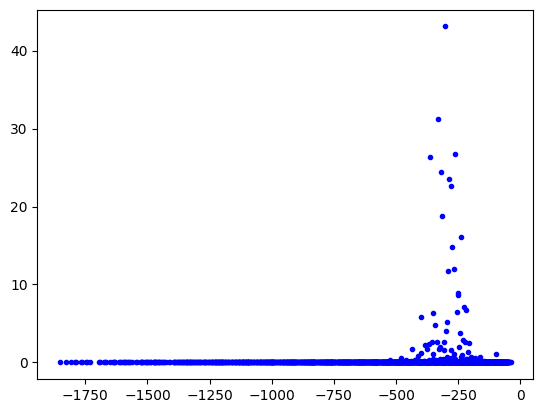

In [68]:
plt.plot(vp1, fval, 'b.', label='Data')

In [69]:

initial_guesses = [40, -250, 50, 1]

popt, pcov = curve_fit(gaussian_vdf1d, vp1, fval, p0=initial_guesses)

print("Optimal parameters (A, mu, sigma, c):")
print(popt)

Optimal parameters (A, mu, sigma, c):
[ 1.46585936e+00 -2.99433155e+02  4.49563890e+01  9.96812287e-04]


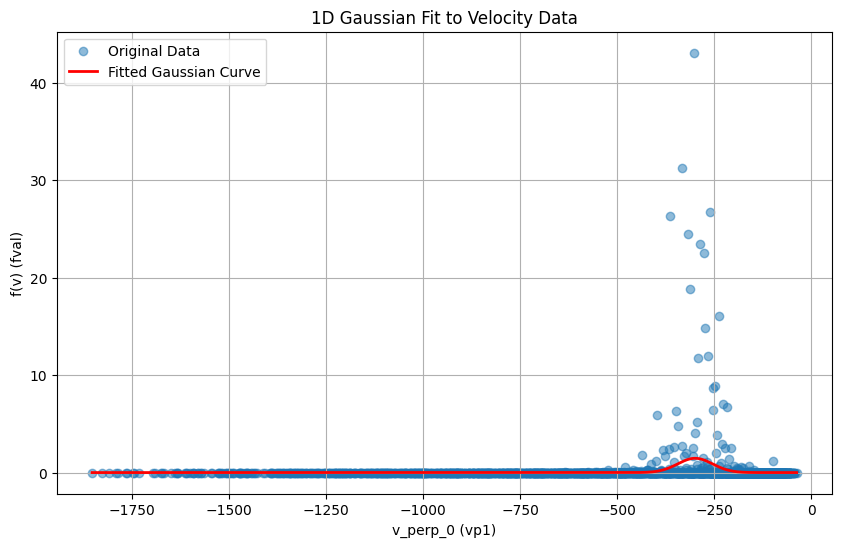

In [70]:
x_fit = np.linspace(min(vp1), max(vp1), 1000)
y_fit = gaussian_vdf1d(x_fit, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(vp1, fval, label='Original Data', alpha=0.5) # Original scattered data points
plt.plot(x_fit, y_fit, color='red', lw=2, label='Fitted Gaussian Curve') # The smooth fitted line

plt.xlabel('v_perp_0 (vp1)')
plt.ylabel('f(v) (fval)')
plt.title('1D Gaussian Fit to Velocity Data')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
df_nonzero = df[df["f(v)"] > 0]

In [72]:
vp0_nz = df_nonzero["v_perp_0"].to_numpy()
vp1_nz = df_nonzero["v_perp_1"].to_numpy()
vpa_nz = df_nonzero["v_para"].to_numpy()
fval_nz = df_nonzero["f(v)"].to_numpy()

In [73]:

initial_guesses = [40, -250, 50, 1]

popt, pcov = curve_fit(gaussian_vdf1d, vp1_nz, fval_nz, p0=initial_guesses)

print("Optimal parameters (A, mu, sigma, c):")
print(popt)

Optimal parameters (A, mu, sigma, c):
[ 7.30216951e+00 -2.94268257e+02  4.96788459e+01  7.97066885e-02]


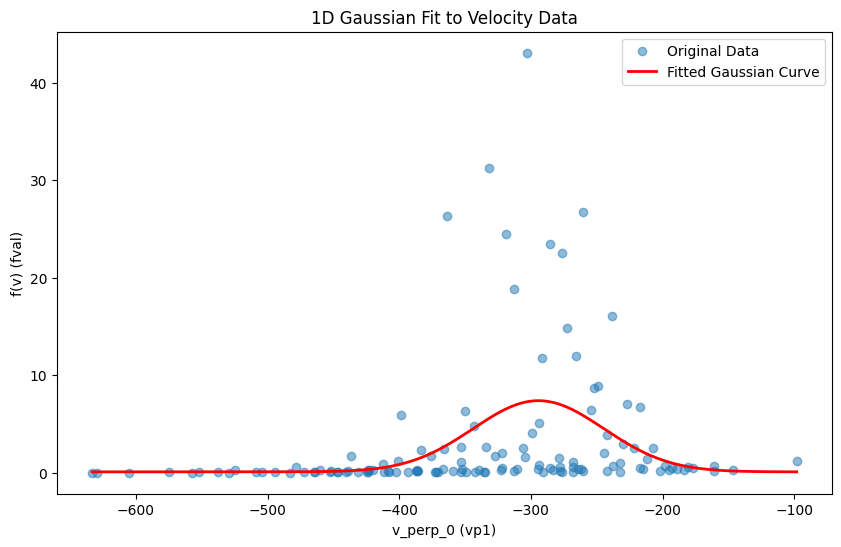

density = 909.3128801036128
bulk velocity flow = -294.2682570662208
2nd moment = 89061.79485077722


In [74]:
x_fit = np.linspace(min(vp1_nz), max(vp1_nz), 1000)
y_fit = gaussian_vdf1d(x_fit, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(vp1_nz, fval_nz, label='Original Data', alpha=0.5) # Original scattered data points
plt.plot(x_fit, y_fit, color='red', lw=2, label='Fitted Gaussian Curve') # The smooth fitted line

plt.xlabel('v_perp_0 (vp1)')
plt.ylabel('f(v) (fval)')
plt.title('1D Gaussian Fit to Velocity Data')
plt.legend()
plt.show()

print("density =", popt[0] * abs(popt[2]) * np.sqrt(2 * np.pi))
print("bulk velocity flow =", popt[1])
print("2nd moment =", popt[2]**2 + popt[1]**2)

# 3D case

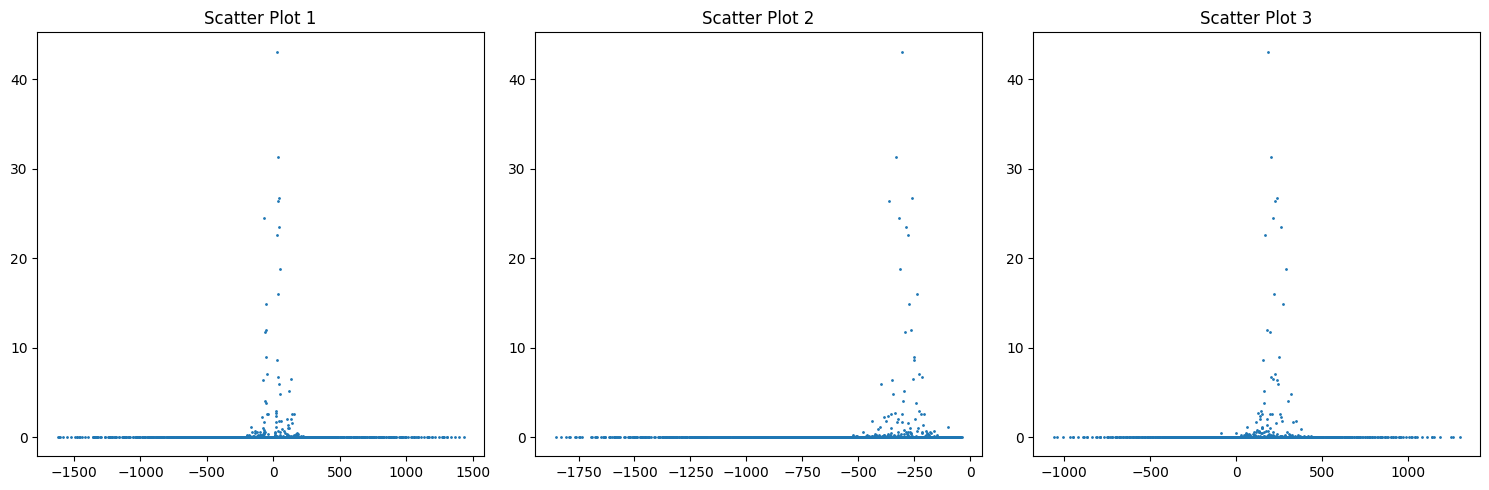

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].scatter(vp0, fval, s=1,)
axes[0].set_title('Scatter Plot 1')

axes[1].scatter(vp1, fval, s=1,)
axes[1].set_title('Scatter Plot 2')

axes[2].scatter(vpa, fval, s=1,)
axes[2].set_title('Scatter Plot 3')

plt.tight_layout()
plt.show()

In [5]:
def gaussian_vdf(X, A, mux, muy, muz, sigmax, sigmay, sigmaz):
    x, y, z = X
    return A * np.exp(-((x - mux)**2 / (2 * sigmax**2) + 
                          (y - muy)**2 / (2 * sigmay**2) + 
                          (z - muz)**2 / (2 * sigmaz**2)))

initial_guesses = [35.0, 0.0, -250.0, 250.0, 10.5, 10.5, 10.5] 

popt, pcov = curve_fit(gaussian_vdf, (vp0, vp1, vpa), fval, p0=initial_guesses)

print("Optimal parameters (A, mux, muy, muz, sigmax, sigmay, sigmaz):")
print(popt)

Optimal parameters (A, mux, muy, muz, sigmax, sigmay, sigmaz):
[  52.43279644   11.656629   -306.18120868  223.50770532   56.93116976
   45.97302446   46.57547613]


Optimal parameters (A, mux, muy, muz, sigmax, sigmay, sigmaz):
[  52.43279644   11.656629   -306.18120868  223.50770532   56.93116976
   45.97302446   46.57547613]


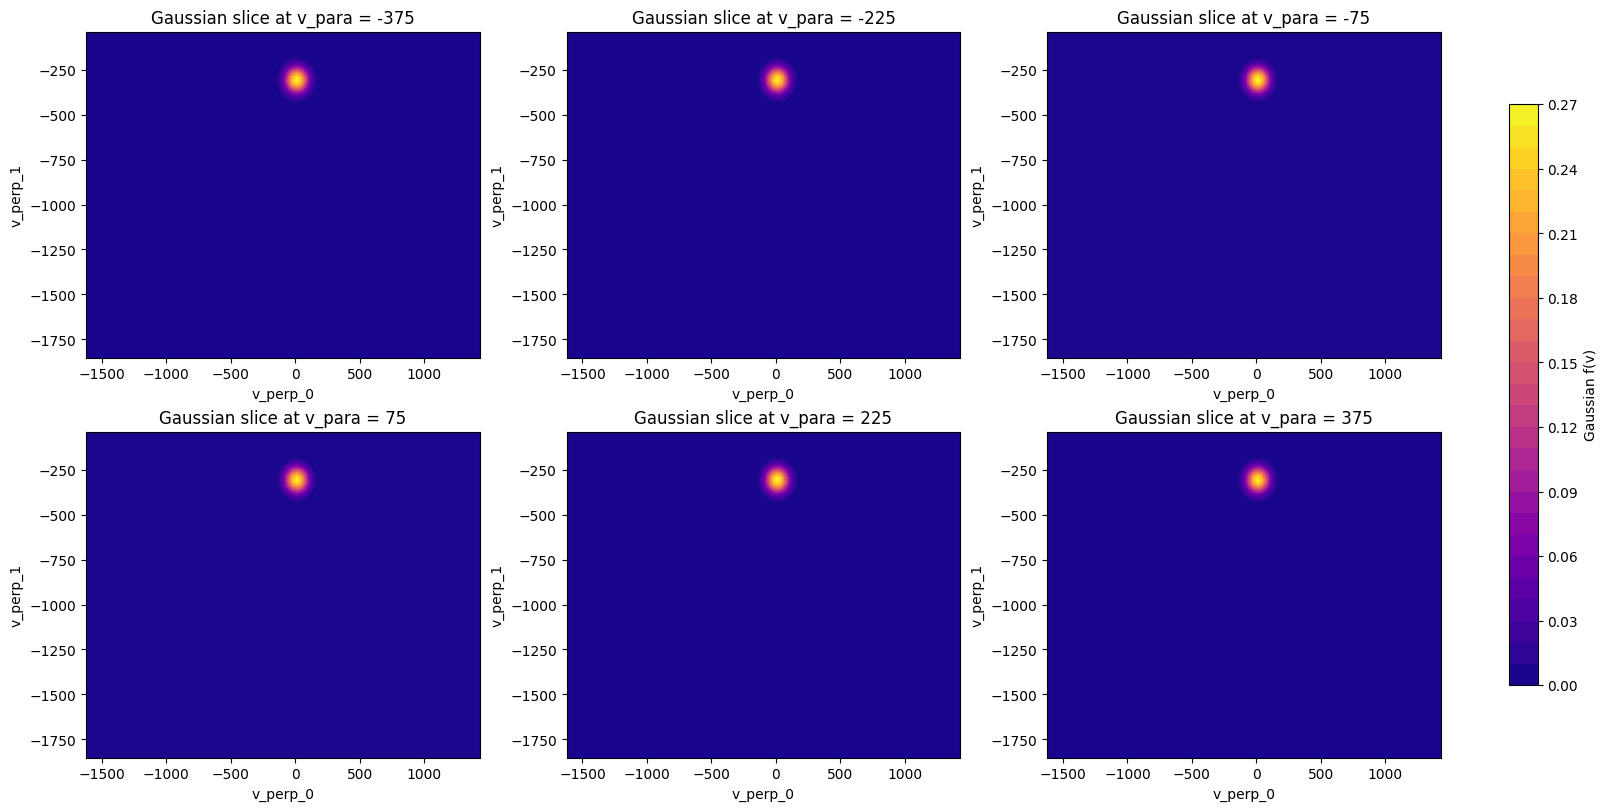

In [6]:
A, mux, muy, muz, sigmax, sigmay, sigmaz = popt

print("Optimal parameters (A, mux, muy, muz, sigmax, sigmay, sigmaz):")
print(popt)

c_values = [-375, -225, -75, 75, 225, 375]

v0_grid, v1_grid = np.mgrid[
    vp0.min():vp0.max():100j,
    vp1.min():vp1.max():100j
]

fig, axes = plt.subplots(2, 3, figsize=(16, 8), constrained_layout=True)
axes = axes.ravel()

for i, c in enumerate(c_values):

    dens_slice = gaussian_vdf(
        (v0_grid, v1_grid, np.full_like(v0_grid, c)),
        A, mux, muy, muz, sigmax, sigmay, sigmaz
    )

    ax = axes[i]
    contour = ax.contourf(
        v0_grid,
        v1_grid,
        dens_slice,
        levels=30,
        cmap="plasma"
    )

    ax.set_title(f"Gaussian slice at v_para = {c}")
    ax.set_xlabel("v_perp_0")
    ax.set_ylabel("v_perp_1")

fig.colorbar(
    contour,
    ax=axes,
    orientation="vertical",
    shrink=0.8,
    label="Gaussian f(v)"
)

plt.show()


In [14]:
fval_floor = np.clip(fval, 1, None)

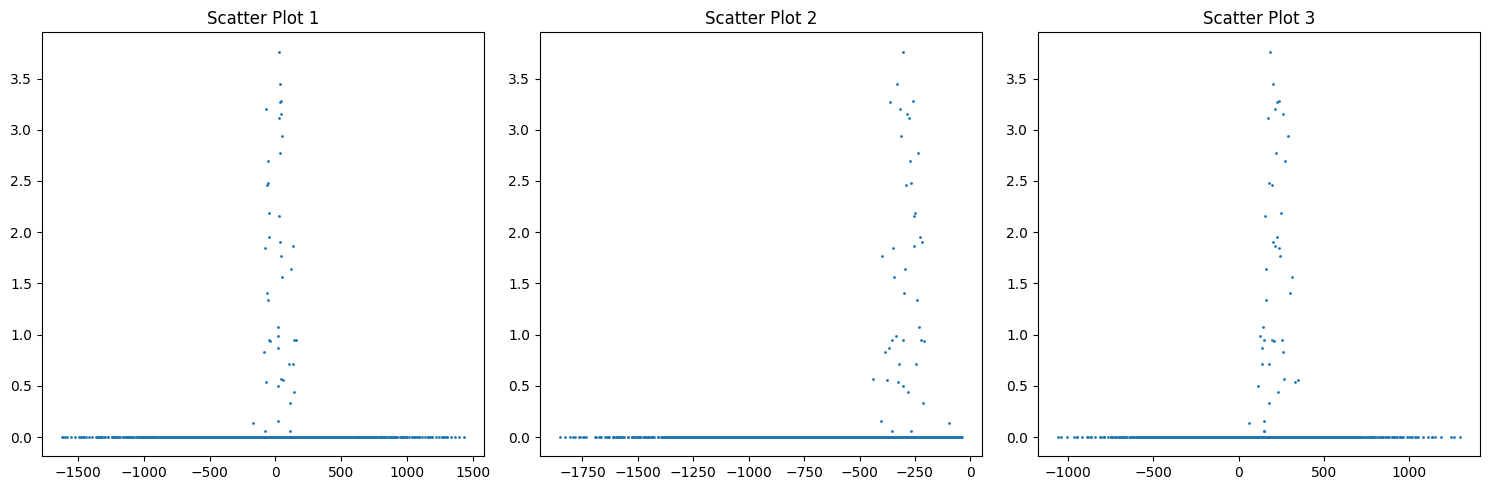

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].scatter(vp0, np.log(fval_floor), s=1,)
axes[0].set_title('Scatter Plot 1')

axes[1].scatter(vp1, np.log(fval_floor), s=1,)
axes[1].set_title('Scatter Plot 2')

axes[2].scatter(vpa, np.log(fval_floor), s=1,)
axes[2].set_title('Scatter Plot 3')

plt.tight_layout()
plt.show()

In [ ]:
initial_guesses = [35.0, 0.0, -250.0, 250.0, 10.5, 10.5, 10.5] 

popt, pcov = curve_fit(gaussian_vdf, (vp0, vp1, vpa), fval, p0=initial_guesses)

print("Optimal parameters (A, mux, muy, muz, sigmax, sigmay, sigmaz):")
print(popt)